## Abgabe SMD A Blatt 01
von Celina Kortmann, Felix Göke und

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Blatt 1
## Exercise 1 - Numerical Stability

Consider the functions  
(a) $f(x)=(x^3+1/3)-(x^3-1/3)$  
(b) $g(x)=((3+x^3/3)-(3-x^3/3))/x^3$ .  
Determine empirically for which ranges of $x$ (roughly) the numerical result 
* deviates from the algebraic by more than 1%,
* is equal to zero 

The algebraic result is:
$f(x)=g(x)=\frac{2}{3}$

In [5]:
f = lambda x: (x**3+1/3)-(x**3-1/3) #kurze anonyme funktion
g = lambda x: ((3+x**3/3)-(3-x**3/3))/x**3
exact = 2/3

x_size=10000
x_a,x_b, f_x, err_f ,g_x, err_g= {},{},{},{},{},{} #arrays um ergebnisse zu speichern
x_a['default'] = np.logspace(4,6,x_size) #erzeugt ein Array mit 10.000 Werten im Bereich von 10^4 bis 10^6 im Standard Datentyp
x_a['32'] = np.logspace(1, 3, x_size, dtype='float32') 
x_a['64'] = np.logspace(4, 6, x_size, dtype='float64')
x_b['default'] = np.logspace(-6,-4,x_size) 
x_b['32'] = np.logspace(-3, -1, x_size, dtype='float32') 
x_b['64'] = np.logspace(-6, -4, x_size, dtype='float64')

for key in x_a: f_x[key]=f(x_a[key]) #wendet f() auf das Array an und speichert es in f_x
for key in x_a: err_f[key]=np.abs(exact-f_x[key])/exact # Berechnet die relative Abweichung vom exakten Ergebnis
for key in x_b: g_x[key]=g(x_b[key]) 
for key in x_b: err_g[key]=np.abs(exact-g_x[key])/exact

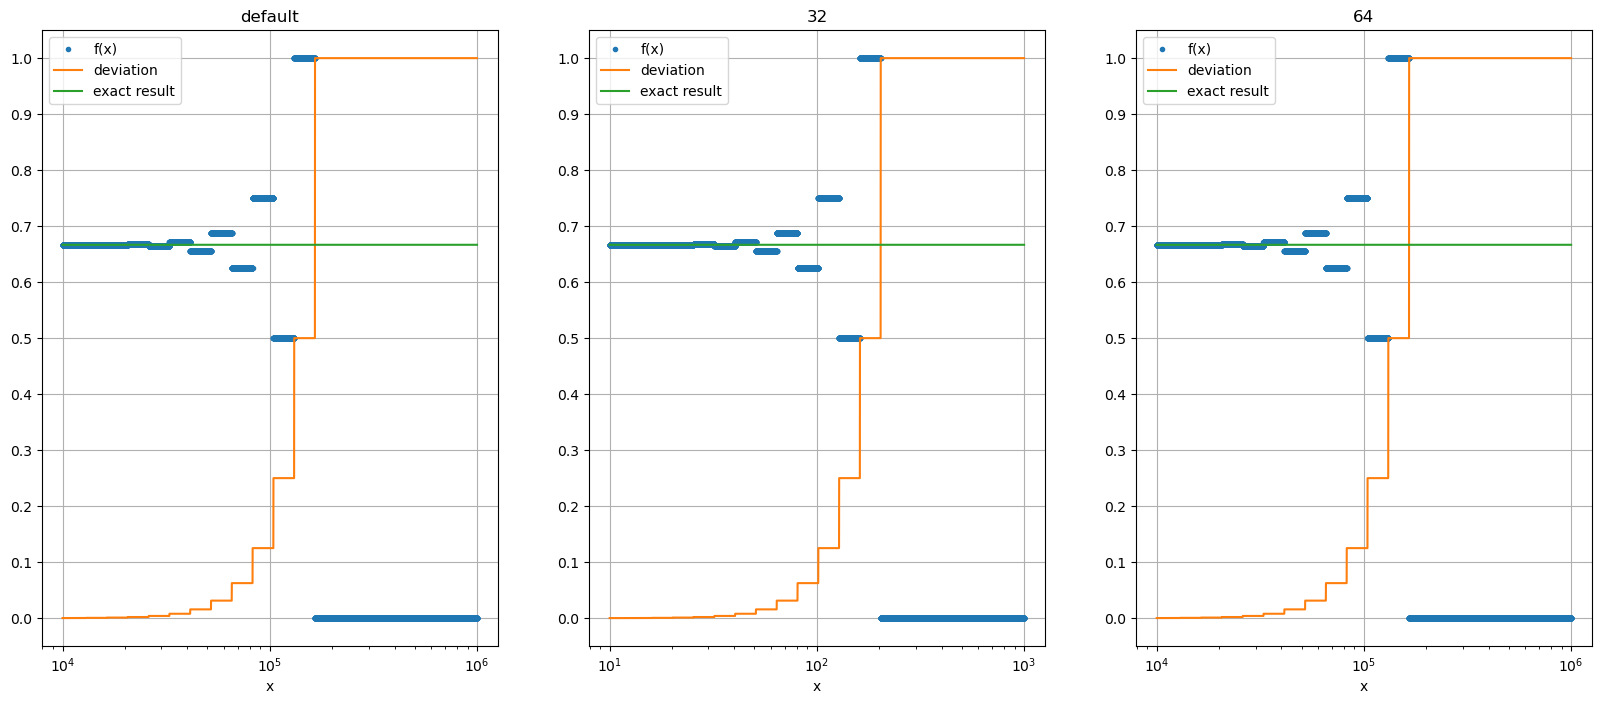

In [21]:
plt.subplots(1,3,figsize=(20,8))

i=1
for key in x_a:
    plt.subplot(1,3,i)
    plt.xscale('log')
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlabel('x')
    plt.title(key)

    plt.plot(x_a[key],f_x[key],'.',label='f(x)')
    plt.plot(x_a[key], err_f[key],'-', label='deviation')
    plt.plot(x_a[key],np.full_like(x_a[key], exact),'-', label='exact result')

    plt.grid(which='major')
    plt.legend()
    i += 1

In [28]:
for key in x_a:
    print(f'precision for: {key}')
    print(f'    last x with a deviate under 1%: x={x_a[key][err_f[key]<0.01][-1]:.3e}')
    print(f'    first x for f(x)=0: x={x_a[key][f_x[key]==0][0]:.3e}')

precision for: default
    last x with a deviate under 1%: x=4.127e+04
    first x for f(x)=0: x=1.652e+05
precision for: 32
    last x with a deviate under 1%: x=5.078e+01
    first x for f(x)=0: x=2.032e+02
precision for: 64
    last x with a deviate under 1%: x=4.127e+04
    first x for f(x)=0: x=1.652e+05


### Ergebnis für f(x)
Dtype | Abweichung < 1% | Bereich für $f(x)=0$
------|-----------------|---------------------
default | $|x|<4.1\cdot 10^4$ | $|x|>1.7\cdot 10^5$
float32 | $|x|<5.1\cdot 10^1$ | $|x|>2.0\cdot 10^2$
float64 | $|x|<4.1\cdot 10^4$ | $|x|>1.7\cdot 10^5$

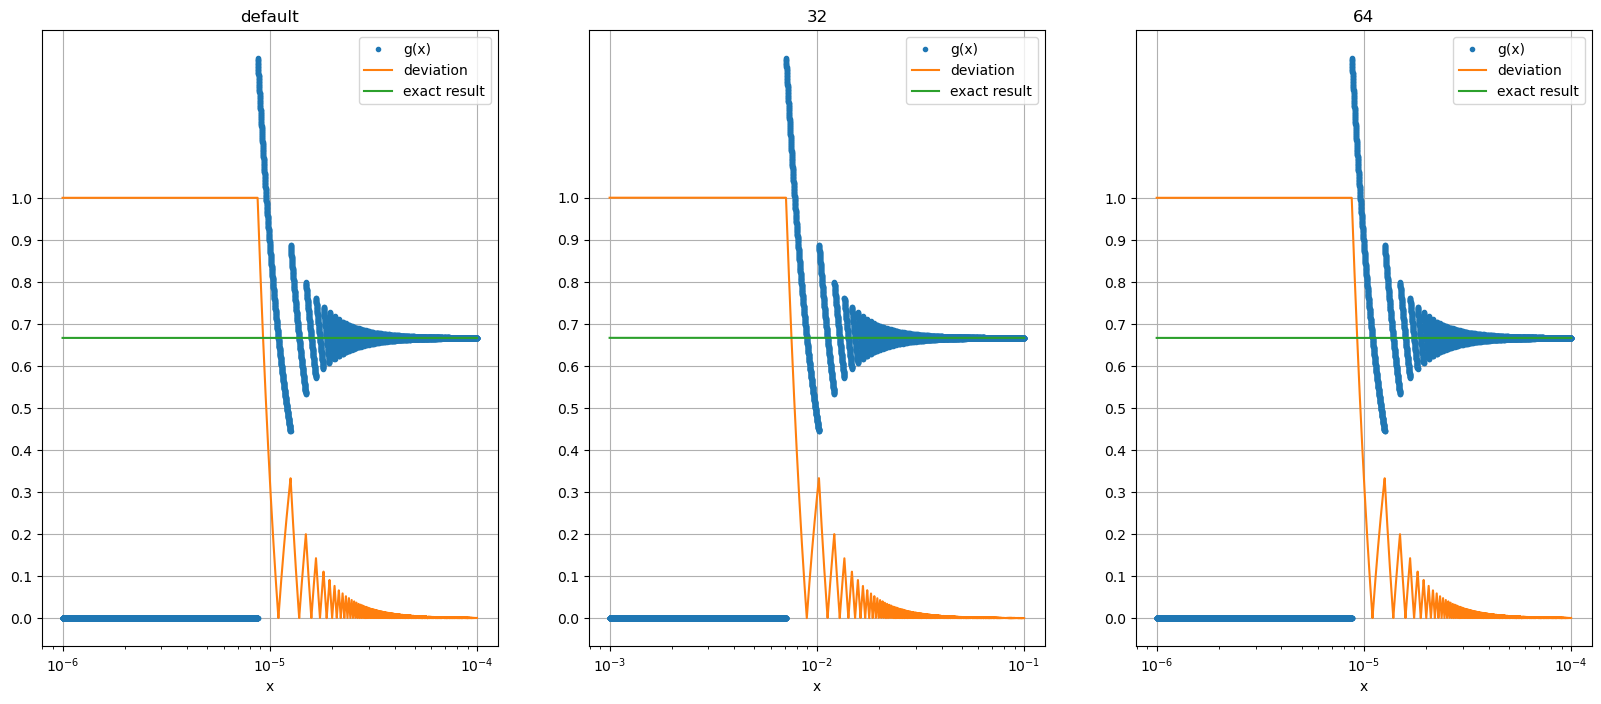

In [29]:
plt.subplots(1,3,figsize=(20,8))

i=1
for key in x_b:
    plt.subplot(1,3,i)
    plt.xscale('log')
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlabel('x')
    plt.title(key)

    plt.plot(x_b[key],g_x[key],'.',label='g(x)')
    plt.plot(x_b[key], err_g[key],'-', label='deviation')
    plt.plot(x_b[key],np.full_like(x_b[key], exact),'-', label='exact result')

    plt.grid(which='major')
    plt.legend()
    i += 1

In [30]:
for key in x_b:
    print(f'precision for: {key}')
    print(f'    last x with a deviate under 1%: x={x_b[key][err_g[key]<0.01][0]:.3e}')
    print(f'    first x for f(x)=0: x={x_b[key][g_x[key]==0][-1]:.3e}')

precision for: default
    last x with a deviate under 1%: x=1.097e-05
    first x for f(x)=0: x=8.732e-06
precision for: 32
    last x with a deviate under 1%: x=8.914e-03
    first x for f(x)=0: x=7.097e-03
precision for: 64
    last x with a deviate under 1%: x=1.097e-05
    first x for f(x)=0: x=8.732e-06


### Ergebnis für g(x)
Dtype | Abweichung < 1% | Bereich für $g(x)=0$
------|-----------------|---------------------
default | $|x|>1.1\cdot 10^{-5}$ | $|x|<8.7\cdot 10^{-6}$
float32 | $|x|>8.9\cdot 10^{-3}$ | $|x|<7.1\cdot 10^{-3}$
float64 | $|x|>1.1\cdot 10^{-5}$ | $|x|<8.7\cdot 10^{-6}$

## Exercise 2: Numerical Stability and Condition 

The expression $f(E,\Theta)$ represents a summand of the differential cross section for the reaction $e^- e^+ \rightarrow \gamma \gamma$

$$
f(E,\Theta)=\frac{2+\sin^2\Theta}{1-\beta^2\cos^2\Theta},
$$
with
$$
\beta=\sqrt{1-\gamma^{-2}},  
\gamma=\frac{E}{m},  
m=511 keV.
$$

(a) Die Funktion wird um Singularitäten numerisch instabil. Wir betrachten demnach
$$
0 \approx 1-\beta^2 \cos^2\Theta
$$
mit $E=50\text{GeV}$ ist $\beta\approx 1$.
Somit wird die Funktion für $\cos^2\Theta \approx 1$ numerisch instabil.

(b)
Hinweise: $1-\beta^2=\frac{1}{\gamma^2}$ und $1=\sin^2\Theta+\cos^2\Theta$
$$
\begin{align}
    f(E,\Theta)&=\frac{2+\sin^2\Theta}{1-\beta^2\cos^2\Theta} \\
    &=\frac{2+\sin^2\Theta}{1-\beta^2+\beta^2\sin^2\Theta} \\
    &=\frac{\frac{2}{sin^2\Theta}+1}{\gamma^{-2}(\sin^{-2}-1)+1} = g(\Theta)
\end{align}
$$



In [16]:
E= 50*10**9 #eV
m=511*10**3 #eV
gamma=E/m
b=np.sqrt(1-gamma**(-2))

f= lambda theta,b: (2+np.sin(theta)**2)/(1-b**2*np.cos(theta)**2)
g= lambda theta, gamma: (2/np.sin(theta)**2 +1)/(1/gamma**2*(1/np.sin(theta)**2-1)+1)

theta_size=100000
d_theta=10**(-3)
theta_min=np.pi-d_theta
theta_max=np.pi
theta_32=np.linspace(theta_min,theta_max, theta_size, dtype='float32')
theta_64=np.linspace(theta_min,theta_max, theta_size, dtype='float64')

f_64=f(theta_64,b)
f_32=f(theta_32,b)
g_64=g(theta_64, gamma)
g_32=g(theta_32, gamma)



/tmp/ipykernel_705/615126554.py:6: RuntimeWarning: divide by zero encountered in divide
  f= lambda theta,b: (2+np.sin(theta)**2)/(1-b**2*np.cos(theta)**2)


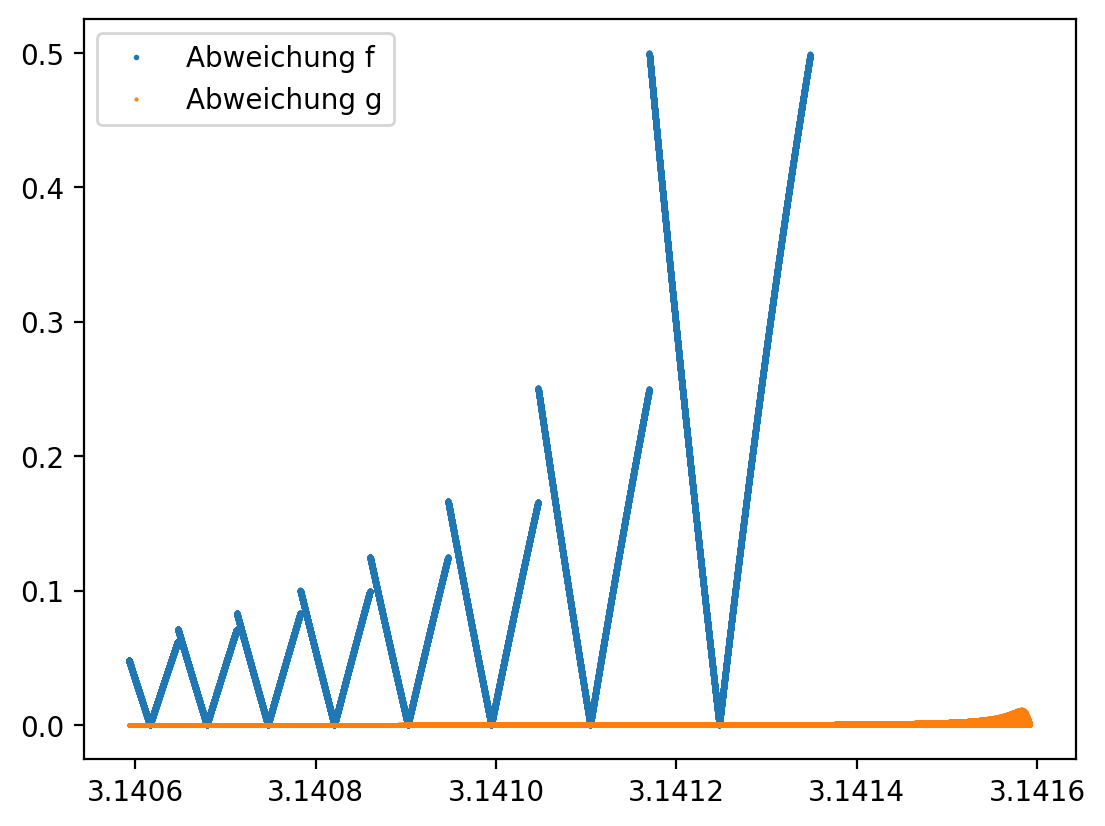

In [21]:
plt.figure(dpi=200)
plt.plot(theta_64, np.abs(f_64-f_32)/f_64,'.',markersize=2, label='Abweichung f')
plt.plot(theta_64, np.abs(g_64-g_32)/g_64, '.',markersize=1, label='Abweichung g')
plt.legend()

Man sieht, dass die Abweichungen von $f$ deutlich größer sind, als die von $g$. Daraus kann man erkennen, dass $g$ die stabilere Funktion ist.
Außerdem kann die Abweichung von $f$ in der Nähe von $\pi$ nicht angezeigt werden, da dort ein Fehler ausgegeben wird (divide by zero).

(d) Konditionszahl bestimmen in Abhängigkeit von $\Theta$
$$
\begin{align}
K&=\left| \Theta \frac{f'(\Theta)}{f(\Theta)}\right| \\
&=\left|- \frac{2\Theta \sin\Theta\cos\Theta(3\beta^2-1)}{(1-\beta^2\cos^2\Theta)(2+\sin^2\Theta)} \right|
\end{align}
$$
mit 
$$
f'(\Theta)=-\frac{2\sin\Theta\cos\Theta(3\beta^2)-1}{(1-\beta^2\cos^2\Theta)^2}
$$

(e)

In [23]:
K=lambda b,t :np.abs(2*t*np.sin(t)*np.cos(t)*(3*b**3-1)/((1-b**2*np.cos(t)**2)*(2+np.sin(t)**2))) # b=beta, t=theta

E= 50*10**9 #eV
m=511*10**3 #eV
gamma=E/m
b=np.sqrt(1-gamma**(-2))

t_size=10000
t=np.linspace(0,np.pi,t_size)

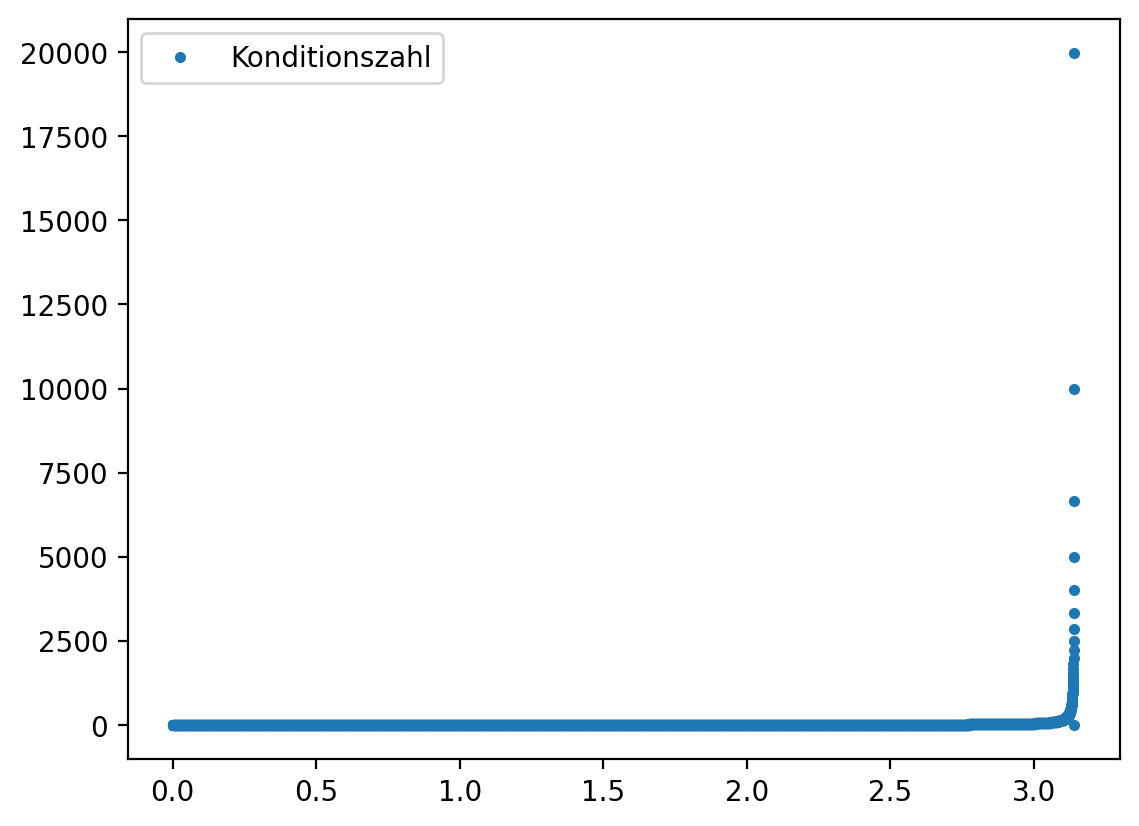

In [26]:
plt.figure(dpi=200)
plt.plot(t,K(b,t),'.' ,label='Konditionszahl')
plt.legend()

Die Konditionszahl ist um $\pi$ deutlich schlechter als um $0$.

(f)
Stabilität ist die Abweichung der numerischen Ergebnisse von der algebraischen Lösung durch Rundungsfehler während Kondition die Abweichung des Ergebnisses bei einem Fehler der Eingangsdaten ohne Rundungsfehler ist.